<a href="https://colab.research.google.com/github/MohitTiwari-07/Project_CSI/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Topic Modeling Using LDA & K-Means

**Objective:** Apply clustering algorithms like **Latent Dirichlet Allocation (LDA)** and **K-Means** to group similar documents and uncover hidden topics in large text corpora.

**Dataset:** 20 Newsgroups  
**Techniques:** TF-IDF · K-Means · LDA · PCA · WordClouds


In [1]:
!pip install -q nltk scikit-learn matplotlib

# Import Libraries and Download NLTK Data


In [2]:
import re
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans


In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
print("Loading 20 Newsgroups dataset...")
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print(f"Loaded {len(documents)} documents.")

Loading 20 Newsgroups dataset...
Loaded 18846 documents.


In [5]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    doc = re.sub(r'[^a-zA-Z]', ' ', doc.lower())
    words = doc.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]
    return ' '.join(words)

print("Preprocessing documents...")
cleaned_docs = [preprocess(doc) for doc in documents]

Preprocessing documents...


In [6]:
print("Vectorizing documents using TF-IDF...")
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(cleaned_docs)
print(f"TF-IDF matrix shape: {X.shape}")

Vectorizing documents using TF-IDF...
TF-IDF matrix shape: (18846, 39819)


In [7]:
print("Applying LDA topic modeling...")
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, num_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:", [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]])

print("\n📌 LDA Topics:")
display_topics(lda, vectorizer.get_feature_names_out())

Applying LDA topic modeling...

📌 LDA Topics:
Topic 1: ['subscribe', 'test', 'performa', 'pica', 'coradeschi', 'tcora', 'ditto', 'mil', 'eprom', 'retarded']
Topic 2: ['intellect', 'geb', 'pitt', 'shameful', 'cadre', 'chastity', 'jxp', 'dsl', 'skepticism', 'gordon']
Topic 3: ['armenian', 'turkish', 'turkey', 'turk', 'muslim', 'armenia', 'genocide', 'serb', 'launch', 'bosnian']
Topic 4: ['game', 'team', 'player', 'year', 'hockey', 'season', 'baseball', 'play', 'fan', 'win']
Topic 5: ['cview', 'ingr', 'catbyte', 'dtmedin', 'volvo', 'rll', 'wheelie', 'rotor', 'opel', 'shaft']
Topic 6: ['israel', 'israeli', 'arab', 'max', 'village', 'msg', 'photography', 'lebanon', 'lebanese', 'palestine']
Topic 7: ['window', 'thanks', 'drive', 'file', 'know', 'card', 'use', 'problem', 'like', 'program']
Topic 8: ['ami', 'battery', 'interlaced', 'ncsl', 'nist', 'phigs', 'msg', 'stack', 'moncton', 'myers']
Topic 9: ['people', 'think', 'god', 'like', 'know', 'time', 'say', 'right', 'thing', 'make']
Topic 10: 

In [8]:
print("\nApplying K-Means clustering...")
k = 10
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
labels = km.labels_
print("K-Means clustering complete.")


Applying K-Means clustering...
K-Means clustering complete.


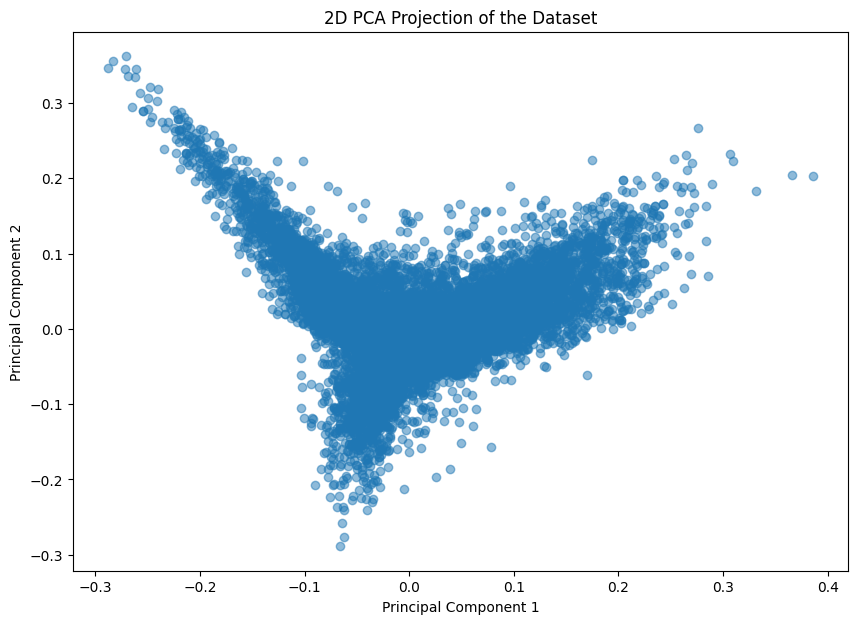

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# If X is sparse, convert it to a NumPy array
X_dense = X.toarray()

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

# Visualize
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("2D PCA Projection of the Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = None  # or specify a list of categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

print(f"Total Documents: {len(newsgroups.data)}")
print(f"Target Categories: {newsgroups.target_names}")


Total Documents: 18846
Target Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=10)
X = vectorizer.fit_transform(newsgroups.data)


In [3]:
from sklearn.cluster import KMeans

k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


In [6]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda_topics = lda.fit_transform(X)


In [7]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(f"Total Documents: {len(newsgroups.data)}")
print(f"Categories: {len(newsgroups.target_names)}")
print("\nSample Document:\n", newsgroups.data[0][:500])


Total Documents: 18846
Categories: 20

Sample Document:
 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a


# Preprocess the Text

In [9]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 3]
    return ' '.join(tokens)

preprocessed_docs = [preprocess(doc) for doc in newsgroups.data[:3000]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# TF-IDF Vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df=10, stop_words='english')
X = vectorizer.fit_transform(preprocessed_docs)
print("TF-IDF Matrix shape:", X.shape)



TF-IDF Matrix shape: (3000, 2968)


# PCA Visualization of Documents

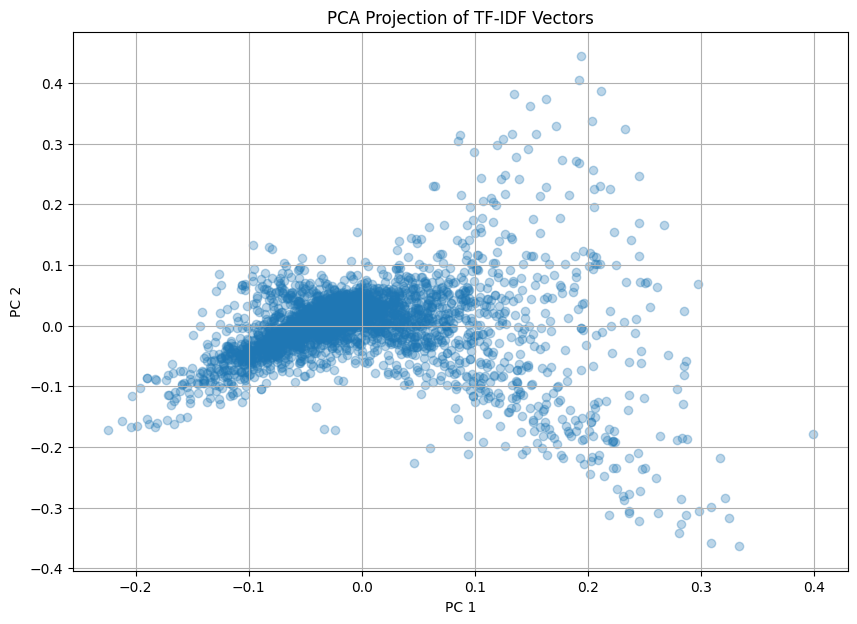

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_dense = X.toarray()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("PCA Projection of TF-IDF Vectors")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


# K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
print("Silhouette Score:", silhouette_score(X, kmeans_labels))


Silhouette Score: -0.020347184207831978


# Visualize K-Means Clusters


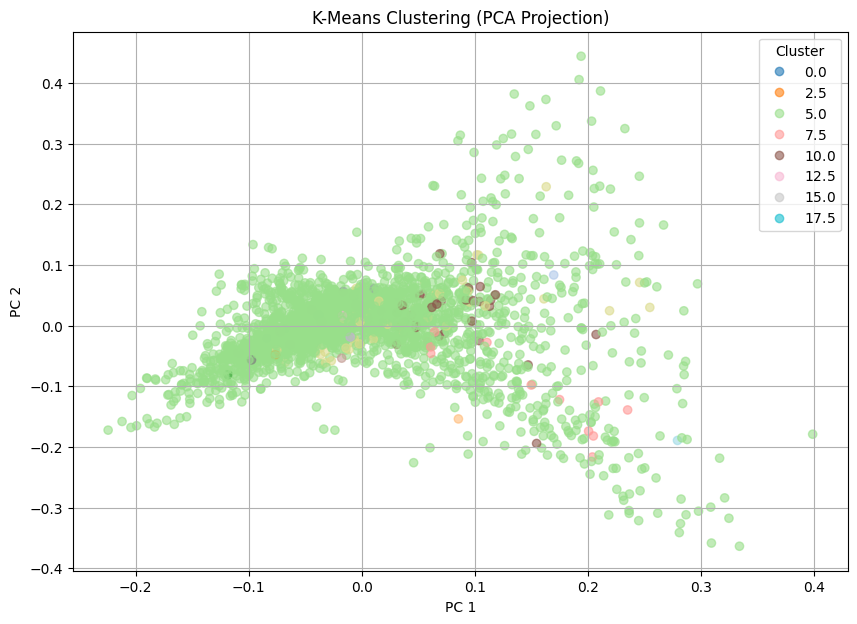

In [13]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab20', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


# Top Words in Each K-Means Cluster

In [20]:
def print_kmeans_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for i, center in enumerate(model.cluster_centers_):
        top_words = center.argsort()[-top_n:][::-1]
        print(f"\nCluster {i}: ", [terms[j] for j in top_words])

print_kmeans_topics(kmeans, vectorizer)



Cluster 0:  ['spot', 'bright', 'rocket', 'visible', 'loop', 'appeared', 'experiment', 'satellite', 'eastern', 'launch']

Cluster 1:  ['software', 'sheet', 'support', 'macintosh', 'color', 'disk', 'free', 'online', 'ease', 'sharp']

Cluster 2:  ['project', 'people', 'spare', 'success', 'sitting', 'management', 'changing', 'feeling', 'writing', 'release']

Cluster 3:  ['event', 'child', 'root', 'appreciate', 'create', 'fall', 'wrong', 'following', 'window', 'help']

Cluster 4:  ['armenian', 'movement', 'greek', 'quote', 'party', 'argic', 'serdar', 'page', 'popular', 'published']

Cluster 5:  ['know', 'like', 'people', 'think', 'time', 'year', 'good', 'problem', 'thanks', 'make']

Cluster 6:  ['proceed', 'powered', 'filter', 'work', 'electrical', 'ordinary', 'battery', 'deep', 'enforcement', 'heavy']

Cluster 7:  ['font', 'window', 'error', 'problem', 'thanks', 'type', 'know', 'searching', 'default', 'xterm']

Cluster 8:  ['technician', 'student', 'speed', 'let', 'mounted', 'factory', 'w

# LDA Topic Modeling

In [21]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=42)
lda_topics = lda.fit_transform(X)
print("LDA topic distribution shape:", lda_topics.shape)


LDA topic distribution shape: (3000, 10)


# Top Words in Each LDA Topic

In [16]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices if i < len(feature_names)]
        print(f"\nTopic {topic_idx}: ", top_words)

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)



Topic 0:  ['1987', '1983', '1980']

Topic 1:  []

Topic 2:  ['1000', 'focus', 'accomplish', 'analysis', 'followed', 'adapter', 'campaign', 'folk', 'advanced', 'follow']

Topic 3:  []

Topic 4:  ['president', 'strike', 'reject', 'shared']

Topic 5:  ['hit']

Topic 6:  ['promised', 'ethnic', 'scholar']

Topic 7:  ['unto']

Topic 8:  ['technique']

Topic 9:  ['raid']

Topic 10:  ['dealt', '1000']

Topic 11:  ['jefferson']

Topic 12:  ['slot', 'runner']

Topic 13:  ['receive', 'unix', 'runner']

Topic 14:  []

Topic 15:  ['representative']

Topic 16:  ['larger']

Topic 17:  []

Topic 18:  ['runner', 'unix']

Topic 19:  ['ohio', 'watt']


# WordClouds for Each Topic

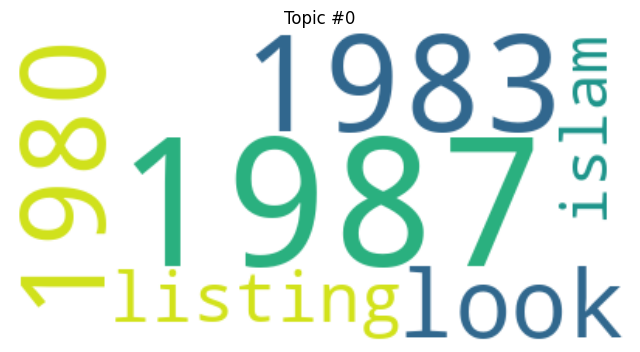

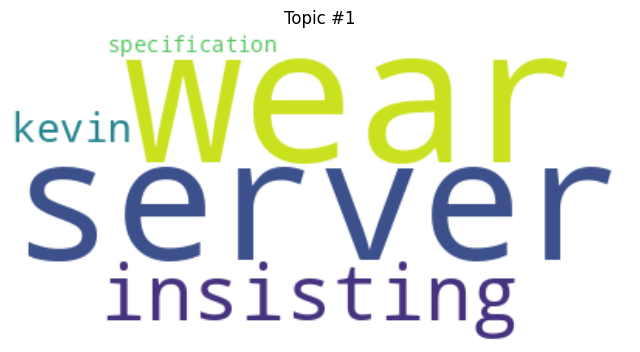

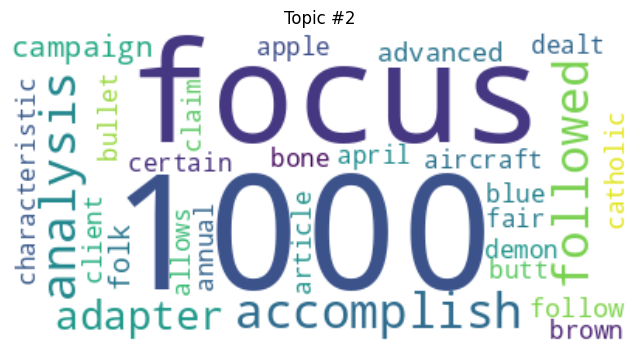

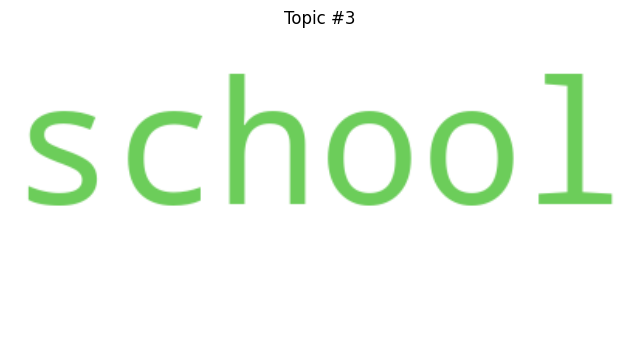

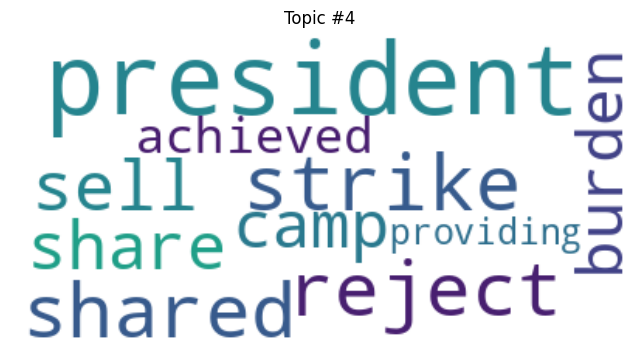

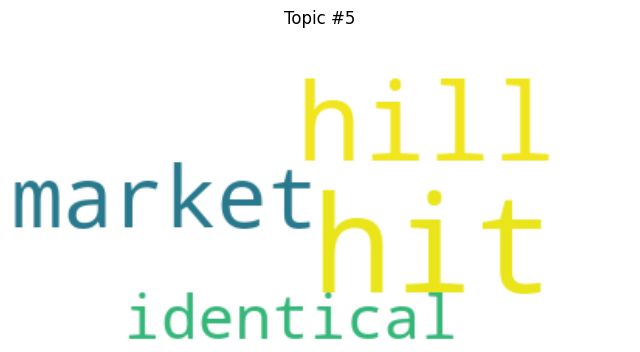

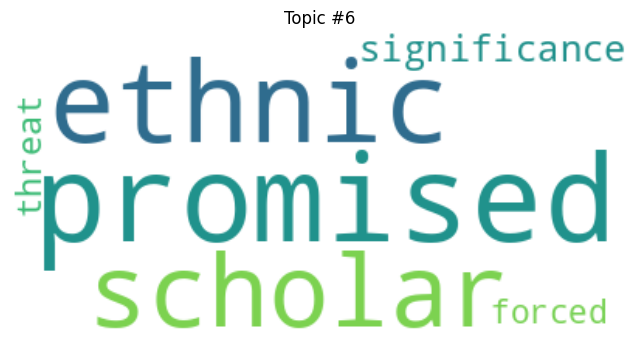

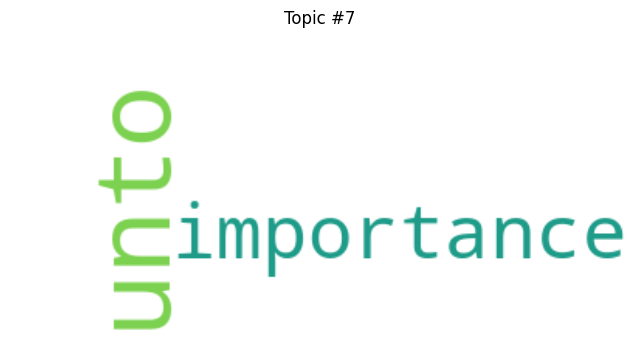

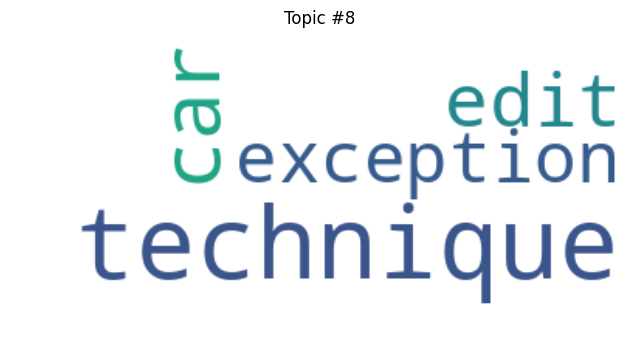

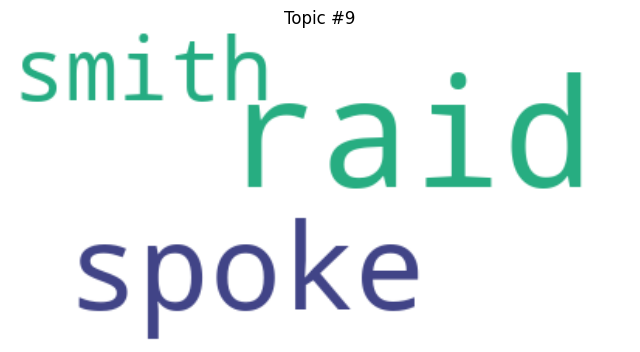

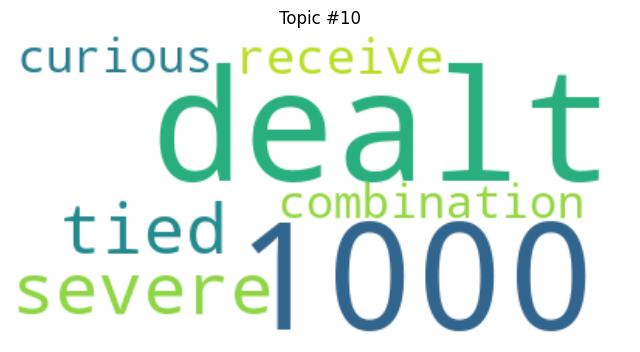

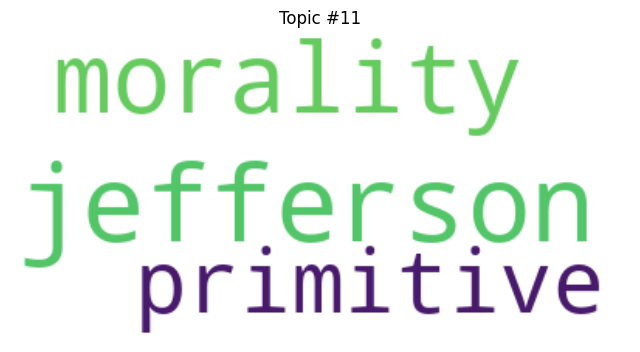

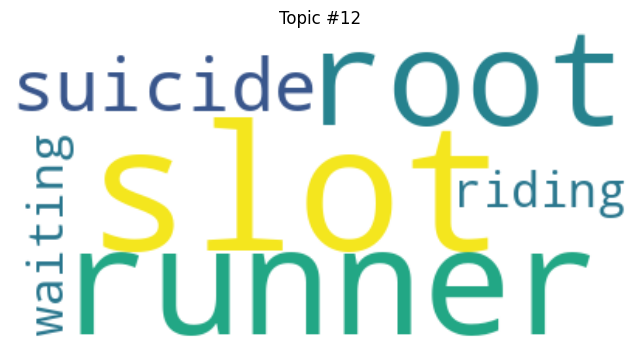

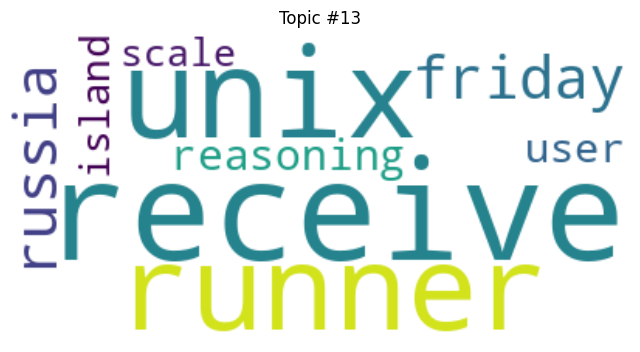

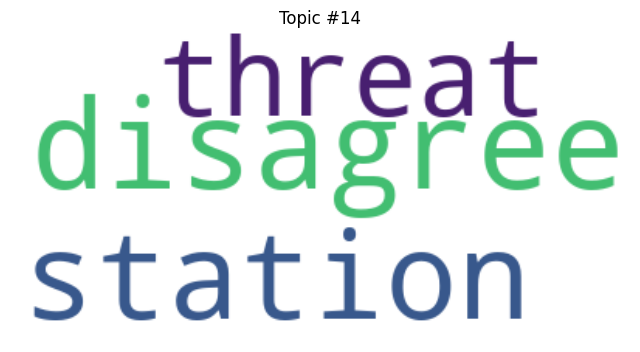

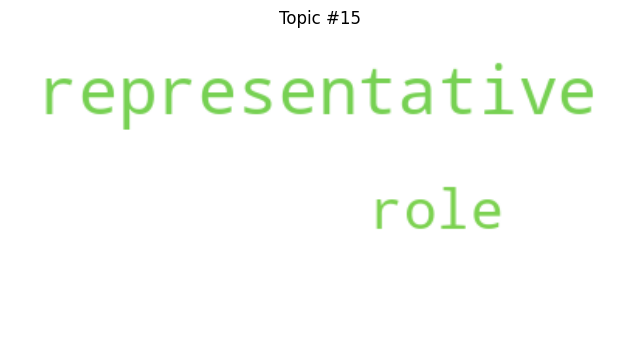

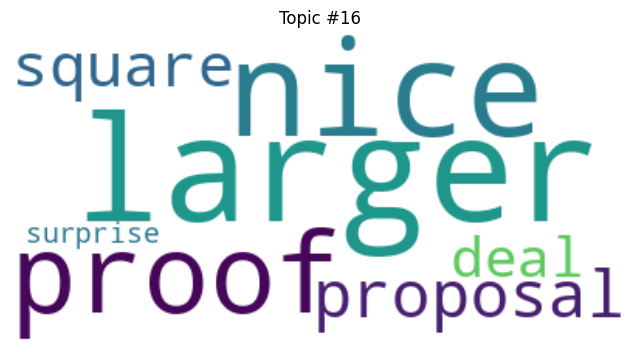

❌ Skipped Topic #17 (no valid words)


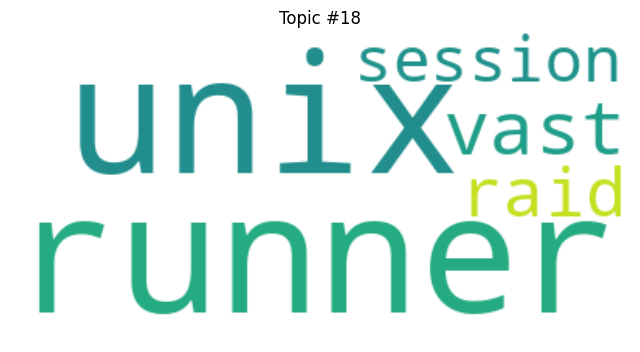

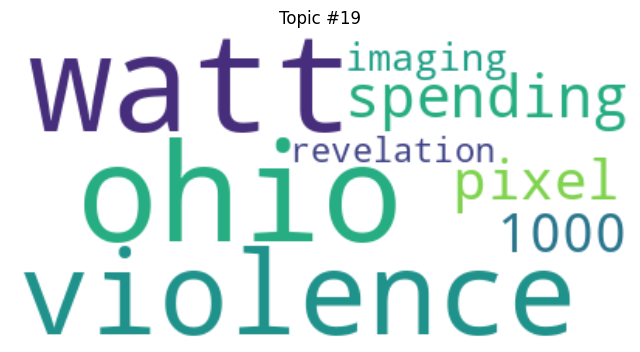

In [19]:
feature_names = vectorizer.get_feature_names_out()
vocab_size = len(feature_names)

for idx, topic in enumerate(lda.components_):
    # Get valid indices only
    top_indices = [i for i in topic.argsort()[-30:] if i < vocab_size]

    # Generate word-frequency dictionary
    words = {feature_names[i]: topic[i] for i in top_indices if topic[i] > 0}

    if words:  # Only draw if we have valid words
        plt.figure(figsize=(8, 5))
        wc = WordCloud(background_color='white').generate_from_frequencies(words)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic #{idx}")
        plt.show()
    else:
        print(f"❌ Skipped Topic #{idx} (no valid words)")


## ✅ Conclusion

- **K-Means** grouped documents into clusters based on word similarity.
- **LDA** gave interpretable topics with top keywords.
- **PCA** and **WordClouds** provided clear visualizations.
- This approach is effective for **understanding large corpora** using unsupervised learning.

